In [27]:
import tensorflow as tf
import numpy as np
from scipy.io import wavfile
from scipy.signal import spectrogram, stft, istft
import matplotlib.pyplot as plt
import librosa
import librosa.display
from misceallaneous import getWavFileAsNpArray, displaySpectrogram
from IPython.display import Audio

samplerate = 12000
nperseg = 1024

clean = getWavFileAsNpArray("../dataset_2/clean/p1.wav")
white = getWavFileAsNpArray("../dataset_2/white/p1.wav")

In [133]:
clean_split = []
white_split = []

samples_length = nperseg*3

for i in range(0, clean.shape[0]-samples_length, samples_length):
    clean_split.append(clean[i:i+samples_length])
    white_split.append(white[i:i+samples_length])
clean_split = np.array(clean_split)
white_split = np.array(white_split)

c, t, Cxx_test = stft(np.array(clean_split[0]), fs=samplerate, nperseg=nperseg)
c, t, Vxx_test = stft(np.array(white_split[0]), fs=samplerate, nperseg=nperseg)
print(clean_split.shape)
print(white_split.shape)

(3553, 3072)
(3553, 3072)
[    0     0     0 ... -4832 -4845 -3834]


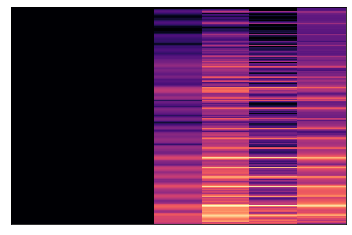

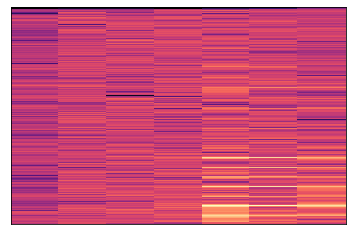

In [104]:
displaySpectrogram(Cxx_test)
plt.show()
displaySpectrogram(Vxx_test)
plt.show()

In [134]:
def simple_autoencoder(size):
    inputs = tf.keras.Input(shape=(size,))
    x = tf.keras.layers.Dense(int(size*0.5), activation="relu")(inputs)
    outputs = tf.keras.layers.Dense(size, activation="relu")(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="skip_autoencoder")
    model.summary()
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    return model

def simple_skip_autoencoder(size):
    inputs = tf.keras.Input(shape=(size,))
    inputs_drop = tf.keras.layers.Dropout(0.1)(inputs)
    x1 = tf.keras.layers.Dense(int(size*0.1), activation="relu")(inputs_drop)
    x2 = tf.keras.layers.Dense(int(size*0.05), activation="relu")(x1)
    x3 = tf.keras.layers.Dense(int(size*0.1), activation="relu")(x2)
    x4 = tf.keras.layers.Add()([x1, x3])
    x5 = tf.keras.layers.Dense(size, activation="relu")(x4)
    x6 = tf.keras.layers.Add()([x5, inputs_drop])
    outputs = tf.keras.layers.Dense(size, activation="linear")(x6)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="skip_autoencoder")
    model.summary()
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    return model

model = simple_skip_autoencoder(clean_split.shape[1])

Model: "skip_autoencoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_31 (InputLayer)           [(None, 3072)]       0                                            
__________________________________________________________________________________________________
dropout_7 (Dropout)             (None, 3072)         0           input_31[0][0]                   
__________________________________________________________________________________________________
dense_126 (Dense)               (None, 307)          943411      dropout_7[0][0]                  
__________________________________________________________________________________________________
dense_127 (Dense)               (None, 153)          47124       dense_126[0][0]                  
___________________________________________________________________________________

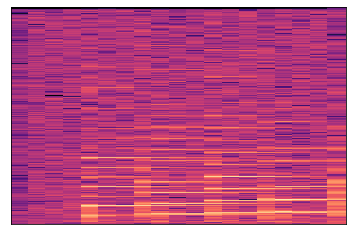

Epoch 1/2
112/112 [==============================] - 8s 67ms/step - loss: 24512384.8319 - accuracy: 0.0086
Epoch 2/2
112/112 [==============================] - 7s 63ms/step - loss: 8420957.2743 - accuracy: 0.0516


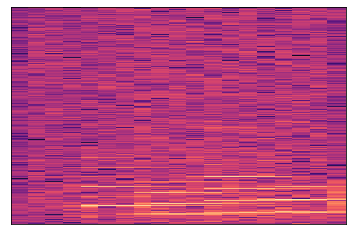

Epoch 1/2
112/112 [==============================] - 8s 68ms/step - loss: 6840597.5000 - accuracy: 0.0743
Epoch 2/2
112/112 [==============================] - 7s 64ms/step - loss: 5939759.5000 - accuracy: 0.0965


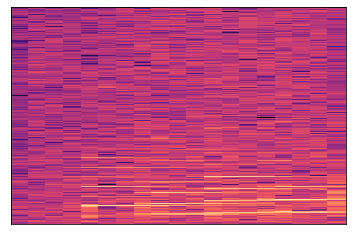

Epoch 1/2
112/112 [==============================] - 7s 64ms/step - loss: 4674020.0000 - accuracy: 0.1157
Epoch 2/2
112/112 [==============================] - 7s 62ms/step - loss: 5147077.5000 - accuracy: 0.1402


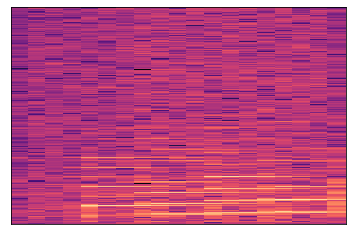

Epoch 1/2
112/112 [==============================] - 8s 72ms/step - loss: 4111802.7500 - accuracy: 0.1461
Epoch 2/2
112/112 [==============================] - 7s 62ms/step - loss: 4468936.5000 - accuracy: 0.1587


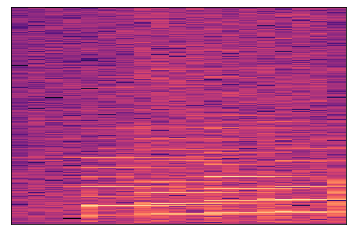

Epoch 1/2
 20/112 [====>.........................] - ETA: 6s - loss: 5077760.0000 - accuracy: 0.1844

KeyboardInterrupt: 

In [135]:
input_test0 = np.reshape(white_split[0, :], (1, white_split.shape[1]))
input_test1 = np.reshape(white_split[1, :], (1, white_split.shape[1]))
input_test2 = np.reshape(white_split[2, :], (1, white_split.shape[1]))
b = np.reshape(input_test0.T, (white_split.shape[1],))
c = np.reshape(input_test1.T, (white_split.shape[1],))
d = np.reshape(input_test2.T, (white_split.shape[1],))
a = np.concatenate((b, c, d))
c, t, Cxx_input_test = stft(a, fs=samplerate, nperseg=nperseg)
displaySpectrogram(Cxx_input_test)
plt.show()


for _ in range(10):
    model.fit(white_split, clean_split, epochs=2)

    output_test0 = model.predict(input_test0)
    output_test1 = model.predict(input_test1)
    output_test2 = model.predict(input_test2)
    e = np.reshape(output_test0.T, (white_split.shape[1],))
    f = np.reshape(output_test1.T, (white_split.shape[1],))
    g = np.reshape(output_test2.T, (white_split.shape[1],))
    h = np.concatenate((e, f, g))
    c, t, Vxx_test = stft(h, fs=samplerate, nperseg=nperseg)
    displaySpectrogram(Vxx_test)
    plt.show()